In [8]:
import numpy as np
import matplotlib.pyplot as plt

class Madaline:
    def __init__(self):
        self.n_lines1 = 3
        self.n_lines2 = 3
        self.w1 = 0.1 * np.random.rand(2, self.n_lines1 + self.n_lines2)
        self.b1 = 0.1 * np.random.rand(self.n_lines1 + self.n_lines2)
        self.w2 = np.ones((self.n_lines1 + self.n_lines2,))
        self.b21 = self.n_lines1 * -1 + 0.1
        self.b22 = self.n_lines2 * -1 + 0.1

    def sample_gen(self, sample_count, mu, sigma):
        x1 = np.random.normal(mu[0], sigma[0], sample_count)
        x2 = np.random.normal(mu[1], sigma[1], sample_count)
        X = np.vstack((x1, x2))
        return X.T

    def step(self, z):
        if z >= 0:
            return 1
        else:
            return -1

    def update_positive_target(self, w1, b1, alpha, inp, z1):
        ind = np.argmin(np.abs(z1))
        w1[:, ind] += alpha * (1 - z1[ind]) * inp
        b1[ind] += alpha * (1 - z1[ind])
        return w1, b1

    def update_negative_target(self, w1, b1, alpha, inp, z1):
        for j in range(len(z1)):
            if z1[j] >= 0:
                w1[:, j] += alpha * (-1 - z1[j]) * inp
                b1[j] += alpha * (-1 - z1[j])
        return w1, b1

    def draw_line(self, w, bias, domain):
        m = -w[0] / w[1]
        b = -bias / w[1]

        start = domain[0] * m + b
        end = domain[1] * m + b

        plt.plot(domain, (start, end))

    def train(self, x, t, alpha=0.0001, max_epochs=5000):
        epoch = 0
        stop = False

        while not stop and epoch < max_epochs:
            e = []
            for i in range(len(x)):
                inp = x[i, :]
                z1 = inp @ self.w1 + self.b1
                h1 = np.array([self.step(z) for z in z1])

                z21 = h1[:self.n_lines1] @ self.w2[:self.n_lines1] + self.b21
                z22 = h1[self.n_lines1:] @ self.w2[self.n_lines1:] + self.b22
                y1 = self.step(z21)
                y2 = self.step(z22)

                error = t[i] - [y1, y2]
                e.append(error)

                if error[0] != 0:
                    if t[i, 0] == 1:
                        self.w1[:, :self.n_lines1], self.b1[:self.n_lines1] = self.update_positive_target(self.w1[:, :self.n_lines1], self.b1[:self.n_lines1], alpha, inp, z1[:self.n_lines1])
                    elif t[i, 0] == -1:
                        self.w1[:, :self.n_lines1], self.b1[:self.n_lines1] = self.update_negative_target(self.w1[:, :self.n_lines1], self.b1[:self.n_lines1], alpha, inp, z1[:self.n_lines1])
                if error[1] != 0:
                    if t[i, 1] == 1:
                        self.w1[:, self.n_lines1:], self.b1[self.n_lines1:] = self.update_positive_target(self.w1[:, self.n_lines1:], self.b1[self.n_lines1:], alpha, inp, z1[self.n_lines1:])
                    elif t[i, 1] == -1:
                        self.w1[:, self.n_lines1:], self.b1[self.n_lines1:] = self.update_negative_target(self.w1[:, self.n_lines1:], self.b1[self.n_lines1:], alpha, inp, z1[self.n_lines1:])

            epoch += 1
            if np.sum(np.array(e) != 0) == 0:
                stop = True

        print(f"# epochs: {epoch}")

    def plot_decision_boundary(self, x_b, x_g, x_o, domain=(-1, 5), xlim=(-1, 5), ylim=(0, 5)):
        plt.scatter(x_b[:, 0], x_b[:, 1])
        plt.scatter(x_g[:, 0], x_g[:, 1], color='green')
        plt.scatter(x_o[:, 0], x_o[:, 1], color='orange')

        for i in range(self.n_lines1):
            a = np.array([1, 5])
            m = -self.w1[0, i] / self.w1[1, i]
            b = m * a - (self.b1[i] / self.w1[1, i])
            plt.xlim(xlim)
            plt.ylim(ylim)
            plt.plot(a, b, '')

        w12 = self.w1[:, self.n_lines1:]
        b12 = self.b1[self.n_lines1:]

        for i in range(self.n_lines2):
            a = np.array([-1, 3])
            m = -w12[0, i] / w12[1, i]
            b = m * a - (b12[i] / w12[1, i])
            plt.xlim(xlim)
            plt.ylim(ylim)
            plt.plot(a, b, '--')
        plt.grid()
        plt.axis('equal')
        plt.xlim(xlim)
        plt.ylim(ylim)



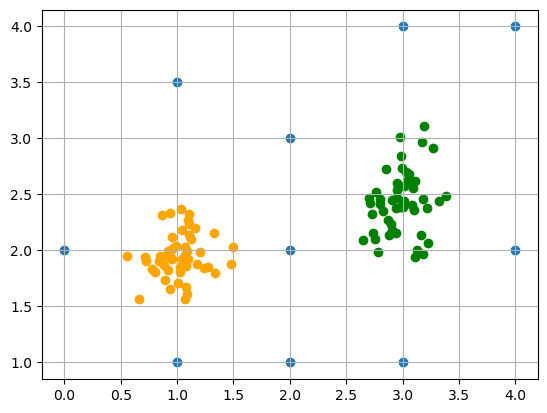

In [9]:
x_g = sampleGen(50, (3,2.5), (0.2,0.3))
y_g = np.array([1]*50)
x_o = sampleGen(50, (1,2), (0.2,0.2))
y_o = np.array([-1]*50)

plt.scatter(x1_b,x2_b)
plt.scatter(x_g[:,0], x_g[:,1], color = 'green')
plt.scatter(x_o[:,0], x_o[:,1], color = 'orange')
plt.grid()
plt.show()
x = np.vstack((x_b, x_g, x_o))
t_g = np.hstack((y_b, y_g, y_o)).T
t_o = np.hstack((y_b, -1*y_g, -1* y_o)).T
t = np.hstack((t_g, t_o))
t = np.reshape(t,(2,110)).T

# epochs: 541


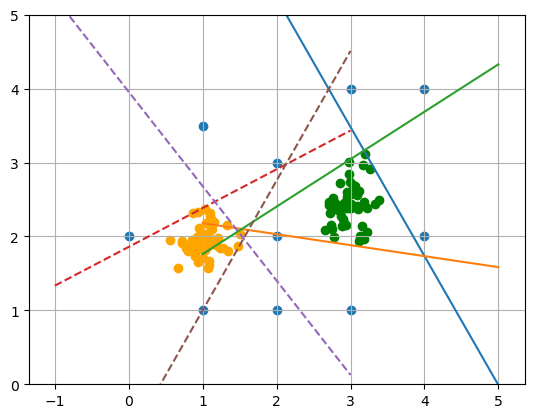

In [12]:
model = Madaline()
model.train(x,t)
model.plot_decision_boundary(x_b,x_g,x_o)